# Estudo de caso - Telecom

Uma empresa de Telecom com 318.463 mil clientes está preocupada com o aumento do cancelamento voluntário das
assinaturas de telefonia fixa. No período de 1 mês, existiram 2.766 cancelamentos voluntários (0,87% dos clientes
cancelaram voluntariamente). Apesar deste número parecer pequeno, em um ano, se nada for feito, 10% da base de
clientes deixarão a companhia. Por meio do estudo da base de dados, o objetivo da empresa é identificar os clientes
com maior probabilidade de cancelar voluntariamente suas linhas telefônicas e fazer ações segmentadas de marketing
de acordo com seu perfil. Serão estudadas as características transacionais e cadastrais dos clientes para explicar o
evento de cancelamento voluntário. O gestor da área de CRM gostaria de saber qual o perfil dos cientes que mais
cancelam, quais suas características e se essa regra é eficaz para predizer o comportamento daqueles clientes que
cancelam no próximo mês.

- Fonte: base simulada, inspirada em problemas reais de consultoria da Profª Karin Ayumi Tamura.

**Evento (Variável resposta):**

- 1, cliente cancelou voluntariamente;
- 0, cliente não cancelou voluntariamente.

**Variáveis Explicativas:**
    
1. Idade do cliente (anos)
2. Quantidade de minutos realizados no último mês
3. Tempo desde a última entrada do cliente na empresa (meses)
4. Tempo em que o cliente ingressou na empresa (meses)
5. Quantidade de retenções nos últimos 6 meses
6. Quantidade de produtos adicionais

In [1]:
#Carregando as bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Telefonia.txt', sep='\t', decimal='.')

In [3]:
df.head(10)

,cod_cliente,Idade,Minutos_realizados_T0,Tempo_safra,Tempo_casa,Qtd_retencao_6meses,Qtd_prod,resposta
0,12452,34.1,1.848,33,127,0,0,0
1,46491,73.7,38.137,178,187,0,2,0
2,66915,71.5,74.415,12,158,0,2,0
3,68827,45.1,13.002,4,137,0,0,0
4,76247,52.8,7.172,69,133,0,2,0
5,100089,29.7,106.007,43,142,0,1,0
6,112623,44.0,1474.066,7,113,0,0,0
7,117889,36.3,14.091,13,113,1,2,0
8,117949,45.1,784.476,103,108,0,0,0
9,118196,57.2,25.355,171,180,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318463 entries, 0 to 318462
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cod_cliente            318463 non-null  int64  
 1   Idade                  284150 non-null  float64
 2   Minutos_realizados_T0  296340 non-null  float64
 3   Tempo_safra            318463 non-null  int64  
 4   Tempo_casa             318463 non-null  int64  
 5   Qtd_retencao_6meses    318463 non-null  int64  
 6   Qtd_prod               318463 non-null  int64  
 7   resposta               318463 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 19.4 MB


In [5]:
print('Quantidade de valores missing na variável Idade: %.0f' % df.Idade.isna().sum())
print('Quantidade de valores missing na variável Minutos_realizados_T0: %.0f' % df.Minutos_realizados_T0.isna().sum())

Quantidade de valores missing na variável Idade: 34313
Quantidade de valores missing na variável Minutos_realizados_T0: 22123


In [6]:
len(df.cod_cliente.unique())

318463

In [7]:
df.loc[df.Minutos_realizados_T0.isna() == 1].head(10)

,cod_cliente,Idade,Minutos_realizados_T0,Tempo_safra,Tempo_casa,Qtd_retencao_6meses,Qtd_prod,resposta
17,119434,39.6,NaN,8,112,0,0,0
20,119519,33.0,NaN,11,112,0,0,0
23,120118,51.7,NaN,132,139,0,0,0
58,124357,64.9,NaN,4,111,0,0,0
67,124847,63.8,NaN,47,133,0,1,0
69,124921,66.0,NaN,3,111,0,0,0
78,125978,33.0,NaN,5,110,1,0,0
88,126665,38.5,NaN,13,137,0,0,0
89,126735,42.9,NaN,9,110,0,0,0
106,127882,36.3,NaN,35,37,1,0,0


In [8]:
df.loc[df.Idade.isna() == 1].head(10)

,cod_cliente,Idade,Minutos_realizados_T0,Tempo_safra,Tempo_casa,Qtd_retencao_6meses,Qtd_prod,resposta
1209,10001012,NaN,33.649,125,131,0,0,0
1252,10001122,NaN,35.090,133,140,0,0,0
1286,10001254,NaN,748.847,182,191,0,1,0
1378,10001469,NaN,307.164,182,191,0,4,0
1387,10001492,NaN,29.557,182,191,0,0,0
1399,10001519,NaN,22.517,182,191,0,0,0
1408,10001536,NaN,12.155,107,112,0,1,0
1416,10001549,NaN,NaN,182,191,0,0,0
1488,10001714,NaN,11.979,182,191,0,2,0
1498,10001742,NaN,NaN,79,83,0,0,0


In [9]:
df[['cod_cliente', 'resposta']].groupby('resposta').count()*100/df.cod_cliente.size

,cod_cliente
resposta,
0,99.131453
1,0.868547


In [10]:
df.describe()

,cod_cliente,Idade,Minutos_realizados_T0,Tempo_safra,Tempo_casa,Qtd_retencao_6meses,Qtd_prod,resposta
count,3.184630e+05,284150.000000,296340.000000,318463.000000,318463.000000,318463.000000,318463.000000,318463.000000
mean,1.053286e+07,51.989840,130.239079,93.842607,109.892540,0.187202,0.729912,0.008685
std,6.431751e+05,17.342716,222.233789,61.331478,58.811786,0.585582,0.951895,0.092790
min,1.245200e+04,0.000000,0.022000,3.000000,3.000000,0.000000,0.000000,0.000000
25%,1.014983e+07,39.600000,21.681000,37.000000,72.000000,0.000000,0.000000,0.000000
50%,1.038445e+07,50.600000,56.408000,90.000000,101.000000,0.000000,1.000000,0.000000
75%,1.080318e+07,62.700000,136.457750,138.000000,149.000000,0.000000,1.000000,0.000000
max,1.174159e+07,118.800000,1474.066000,219.000000,230.000000,45.000000,30.000000,1.000000


In [11]:
df = df.drop('cod_cliente', axis=1)

In [12]:
#    Podemos tratar os missings da variável Minutos_realizados_T0 como 0, pois não temos nenhum valor igual a zero 
#significando que provavelmente um dado NaN é igual um cliente que não realizou ligações durante esse período.

df.Minutos_realizados_T0.replace(to_replace = np.nan, value = 0, inplace=True)

In [13]:
#    Trancando o missing da variável idade por 999

df.Idade.replace(to_replace = np.nan, value = 999, inplace=True)
df.Idade = [i if i > 18 or i < 100 else 999 for i in df.Idade]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318463 entries, 0 to 318462
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Idade                  318463 non-null  float64
 1   Minutos_realizados_T0  318463 non-null  float64
 2   Tempo_safra            318463 non-null  int64  
 3   Tempo_casa             318463 non-null  int64  
 4   Qtd_retencao_6meses    318463 non-null  int64  
 5   Qtd_prod               318463 non-null  int64  
 6   resposta               318463 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 17.0 MB


In [15]:
#Verificar se existem dados de pessoas com idade menor que 18 anos

len([i for i in df.Idade if i < 18])

1833

In [16]:
#Verificar se existem daddos de pessoas com idade maior que 100 anos

len([i for i in df.Idade if i > 100])

35429

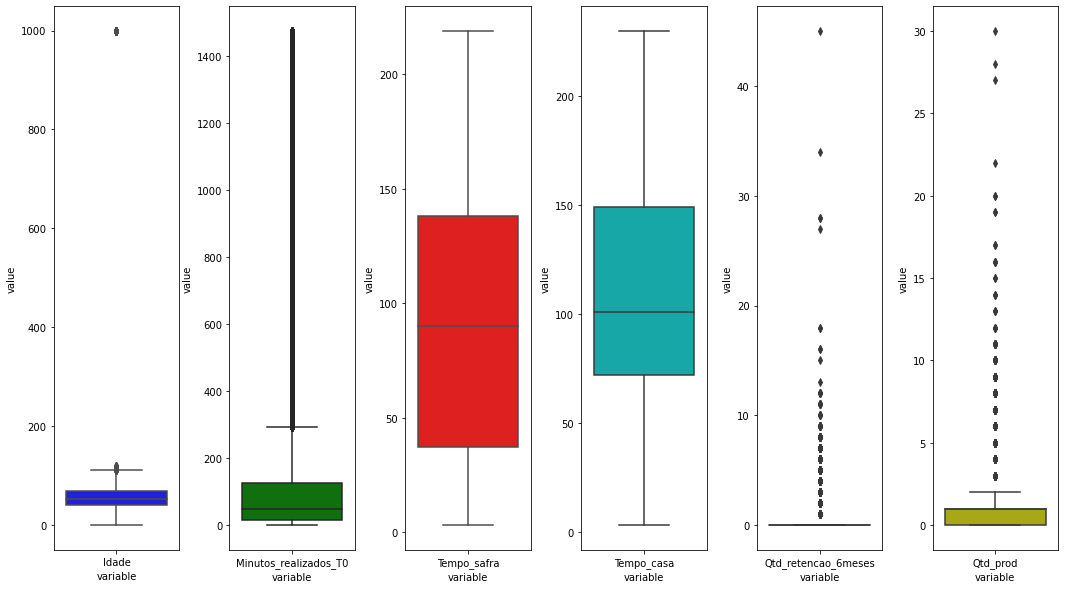

In [17]:
#Análise univariada
fig, axes = plt.subplots(1, 6, figsize=(18,10))
fig.subplots_adjust(hspace=0.1, wspace=0.4)

colors = ['b', 'g', 'r', 'c', 'm', 'y']

for n, i in enumerate([i for i in df.columns if i != 'resposta']):
    sns.boxplot(data=df[[i]].melt(), x='variable', y='value', ax=axes[n], color=colors[n])

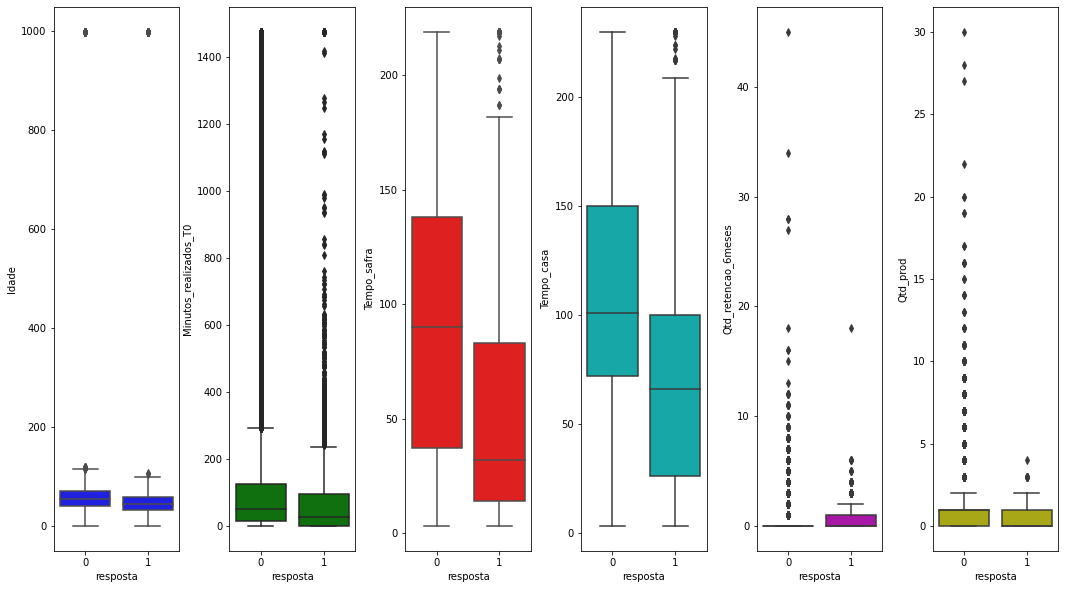

In [18]:
#Análise bivariada

fig, axes = plt.subplots(1, 6, figsize=(18,10))
fig.subplots_adjust(hspace=0.1, wspace=0.4)

colors = ['b', 'g', 'r', 'c', 'm', 'y']

for n, i in enumerate([i for i in df.columns if i != 'resposta']):
    sns.boxplot(data=df, x='resposta', y=i, ax=axes[n], color=colors[n])

In [26]:
df['Idade_q'] = pd.qcut(df.Idade, 4)
df.Idade_q.value_counts()

(40.7, 53.9]      83987
(-0.001, 40.7]    81642
(69.3, 999.0]     79543
(53.9, 69.3]      73291
Name: Idade_q, dtype: int64

In [20]:
df['Minutos_realizados_T0_q'] = pd.qcut(df.Minutos_realizados_T0, 4)
df.Minutos_realizados_T0_q.value_counts()

(-0.001, 16.082]       79621
(49.72, 126.731]       79615
(16.082, 49.72]        79614
(126.731, 1474.066]    79613
Name: Minutos_realizados_T0_q, dtype: int64

In [21]:
df['Tempo_safra_q'] = pd.qcut(df.Tempo_safra, 4)
df.Tempo_safra_q.value_counts()

(2.999, 37.0]     80635
(37.0, 90.0]      80361
(138.0, 219.0]    79072
(90.0, 138.0]     78395
Name: Tempo_safra_q, dtype: int64

In [22]:
df['Tempo_casa_q'] = pd.qcut(df.Tempo_safra, 4)
df.Tempo_casa_q.value_counts()

(2.999, 37.0]     80635
(37.0, 90.0]      80361
(138.0, 219.0]    79072
(90.0, 138.0]     78395
Name: Tempo_casa_q, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318463 entries, 0 to 318462
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Idade                    318463 non-null  float64 
 1   Minutos_realizados_T0    318463 non-null  float64 
 2   Tempo_safra              318463 non-null  int64   
 3   Tempo_casa               318463 non-null  int64   
 4   Qtd_retencao_6meses      318463 non-null  int64   
 5   Qtd_prod                 318463 non-null  int64   
 6   resposta                 318463 non-null  int64   
 7   Idade_q                  318463 non-null  object  
 8   Minutos_realizados_T0_q  318463 non-null  category
 9   Tempo_safra_q            318463 non-null  category
 10  Tempo_casa_q             318463 non-null  category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 20.3+ MB
